# Reanalyse Rudy's data
The aim of this script is to check Rudy's analysis

In [1]:
import os
import numpy as np
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import signal

from ephyviewer import mkQApp, MainViewer, TraceViewer


pd.set_option('display.max_colwidth', None)

In [2]:
folderPath = 'W:\projets_communs\TMRodent\enregistrements rats openephys'
print(os.path.exists(folderPath))
unidentifiedOffset=-0.2

True


In [3]:
conditions = pd.DataFrame(
    data={
        ('2024/02/12',np.nan, np.nan, 'femelle'),
        ('2024/02/14',560, 440, 'femelle'),
        ('2024/02/14',np.nan, np.nan, 'gros mâle'), #not sure what happend here
        ('2024/02/15',560, 440, 'gros mâle'),
        ('2024/02/16',1000, 440, 'gros mâle'),
        ('2024/02/19',np.nan, np.nan, ''),
        ('2024/02/20',1000, 5000, 'gros mâle'),
        ('2024/02/21',560, 5000, 'femelle'),
        ('2024/02/22',560, 20000, 'gros mâle'),
        ('2024/02/23',1000, 5000, 'femelle'),
        ('2024/02/26',560, 5000, 'gros mâle'),
        ('2024/02/27',560, 20000, 'femelle'),
        ('2024/02/28',220, 20000, 'femelle'),
        ('2024/02/29',220, 20000, 'gros mâle')
        },
    columns=('date','SoundInt','SoundFreq','Animal')
)
conditions['date']=pd.to_datetime(conditions['date'])
conditions=conditions.sort_values(by='date').reset_index(drop=True)
print(conditions)
print(conditions.dtypes)

         date  SoundInt  SoundFreq     Animal
0  2024-02-12       NaN        NaN    femelle
1  2024-02-14       NaN        NaN  gros mâle
2  2024-02-14     560.0      440.0    femelle
3  2024-02-15     560.0      440.0  gros mâle
4  2024-02-16    1000.0      440.0  gros mâle
5  2024-02-19       NaN        NaN           
6  2024-02-20    1000.0     5000.0  gros mâle
7  2024-02-21     560.0     5000.0    femelle
8  2024-02-22     560.0    20000.0  gros mâle
9  2024-02-23    1000.0     5000.0    femelle
10 2024-02-26     560.0     5000.0  gros mâle
11 2024-02-27     560.0    20000.0    femelle
12 2024-02-28     220.0    20000.0    femelle
13 2024-02-29     220.0    20000.0  gros mâle
date         datetime64[ns]
SoundInt            float64
SoundFreq           float64
Animal               object
dtype: object


In [4]:
listexpe = pd.DataFrame(
    #data={},
    columns=('expe','path')
)
for d in filter(lambda d: os.path.isdir(os.path.join(folderPath,d)), os.listdir(folderPath)):
    try:
        theDate = datetime.strptime(d, '%Y-%m-%d_%H-%M-%S').date()
        filt = conditions.date.dt.strftime('%Y-%m-%d')==str(theDate)
        for file in glob.glob(os.path.join(folderPath,d,'**','*.dat'),recursive = True):
            if (os.stat(file).st_size > 0) :
                listexpe = pd.concat([listexpe, pd.DataFrame(data=dict(expe=conditions[filt].index.to_list(), path=file))], ignore_index=True)
            #listexpe.append({'expe': conditions[filt].index.to_list(), 'path': file}, ignore_index=True)
    except Exception as error:
        #print(error)
        print(f"the folder {d} did not match a date, it must not have been an experiment")
display(listexpe)

the folder données brutes csv did not match a date, it must not have been an experiment
the folder résultats did not match a date, it must not have been an experiment


,expe,path
0,0,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
1,1,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
2,2,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
3,3,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
4,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
5,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
6,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat
7,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat
9,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat


In [5]:
# info gathered from settings.xml
sampling_rate=2000
numChannels=64

#info gathered from 1_resampling
channels_Id = {
    "gros mâle": [0,31],
    "femelle": [32,63]
}

#info gathered from 2_TMRfile
EMG_Ch = {
    "femelle": 57, #ch25 + 32 (confirmed by ephyviewer)
    "gros mâle": 21 #Rudy disais 22 mais non!! plutot 20 ou 21
}

HIP_Ch = {
    "femelle": 62, #ch0, ch30, ch31, ch32 + 32 (32, 61, 62, 63 confirmed by ephyviewer)
    "gros mâle": 30 
}

#femelle : 34-39 => LFPs 
#gros mâle : 0-9, 11, 12, 14, 15, 17, 18, 26, 28-31 => LFPs



In [6]:
# Charger les timestamps de l'acquisition
def getTSFile(row):
    bn,fn = os.path.split(row.path)
    TSPath = os.path.join(bn,'timestamps.npy')
    return TSPath

listexpe['TSPath']= listexpe.apply(getTSFile, axis=1)
display(listexpe)


#W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-29_09-45-35\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy

,expe,path,TSPath
0,0,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-12_10-03-15\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
1,1,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
2,2,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-14_09-42-36\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
3,3,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-15_10-38-30\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
4,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
5,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_11-11-21\Record Node 102\experiment1\recording2\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
6,4,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-16_12-59-52\Record Node 102\experiment1\recording1\continuous\Acquisition_Board-104.Rhythm Data\timestamps.npy
7,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_09-48-56\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy
9,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_13-32-20\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy


In [7]:
# Charger les timestamps des stimulations
def getEventFile(row):
    components = row.path.split(os.sep)
    components[8]='events'
    components[-1]='TTL'
    #print(components)
    TTLPath = os.path.join(*components,'timestamps.npy')
    #print(os.stat(TTLPath).st_size)
    if (os.stat(TTLPath).st_size <= 128) :
        TTLPath=None
    return TTLPath

listexpe['TTL']= listexpe.apply(getEventFile, axis=1)
listexpe = listexpe.drop(listexpe[listexpe.TTL.isnull()].index)
display(listexpe)


#W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-29_09-45-35\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy

,expe,path,TSPath,TTL
8,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_10-59-51\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
10,6,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-20_14-31-33\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
11,7,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
12,8,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-22_10-08-48\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
13,9,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-23_09-56-10\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
14,10,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-26_10-02-40\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
15,11,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\timestamps.npy,W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-27_09-55-37\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
16,12,W:\projets_communs\TMRodent\enregistrements rats openephys\2024-02-28_09-41-48\Record_Node_103\experiment1\recording1\continuous\Acquisition_Board-100.Rhythm Data\continuous.dat,W:\projets_communs\TMRodent

In [8]:
def filt_trace(trace,type,expeIndex):
    theDate=conditions.loc[expeIndex,'date'].strftime('%Y-%m-%d')
    fitlerSavingName=os.path.abspath(os.path.join(folderPath,'..','résultats\Rudy',str(theDate),f'{type}_filt.npy'))

    if os.path.isfile(fitlerSavingName):
        print(f"the {fitlerSavingName} already exists so importing it to save time")
        filt=np.load(fitlerSavingName)
    else:
        print(f"the {type} trace is not filtered yet so filtering it now and saving it {fitlerSavingName}")
        # Filter parameter :
        if type=='EMG':
            f_lowcut = 200.
            f_hicut = 400.
        elif type=='HIP':
            f_lowcut = 0.5
            f_hicut = 100 #30.
        N = 4
        fs = sampling_rate
        nyq = 0.5 * fs
        Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


        # Filter creation :
        b, a = signal.butter(N, Wn, 'band')
        filt = signal.filtfilt(b, a, trace)

        os.makedirs(os.path.split(fitlerSavingName)[0], exist_ok=True) 
        np.save(fitlerSavingName,filt)

    return filt


In [9]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [10]:
def plotERP(expeIndex,type):
    animal=conditions.iloc[expeIndex].Animal

    TSfile=listexpe.loc[listexpe.expe==expeIndex,'TTL'].values[0]
    print(TSfile)
    ttl=np.load(TSfile)
    
    ePhyfile=listexpe.loc[listexpe.expe==expeIndex,'path'].values[0]
    if type=='EMG':
        EMG=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)[:,EMG_Ch[animal]]
        filt_EMG=filt_trace(EMG,"EMG",expeIndex)
    if type=='HIP':
        HIP=np.memmap(ePhyfile, mode= 'r', dtype="int16").reshape(-1,64)[:,HIP_Ch[animal]]
        filt_HIP=filt_trace(HIP,"HIP",expeIndex)

    DataTSfile=listexpe.loc[listexpe.expe==expeIndex,'TSPath'].values[0]
    dataTS=np.load(DataTSfile)

    fs=sampling_rate
    duration_before = 0.5  # Durée avant le stimulus en secondes
    duration_after = 1   # Durée après le stimulus en secondes
    pre_index_count=int(duration_before * fs)
    post_index_count=int(duration_after * fs)
    num_trials = int(ttl.shape[0] / 2)  # Nombre de stimuli

    # Créer un vecteur de temps pour la période autour de chaque stimulus
    tt2 = np.arange(pre_index_count+post_index_count+1)/fs-duration_before  # +1/fs pour inclure la dernière valeur

    # Initialiser un tableau pour stocker les ERP
    erp = np.zeros((len(tt2),0), dtype=np.float64)
    #dataTS=dataTS-dataTS[0]
    #ttl=ttl-dataTS[0]
    #print(dataTS[0], ttl[0:20])
    # Boucler à travers chaque stimulus et calculer l'ERP
    
    for i in range(num_trials):
        timestamp = ttl[int(i * 2)] #every 5s
        ttlIdx= int(timestamp*fs)
        #use recording timestamps to align data with precision
        recIdx=find_nearest(dataTS,timestamp + unidentifiedOffset)#-dataTS[0]
        #print(timestamp, ttlIdx, recIdx, dataTS[ttlIdx], dataTS[recIdx])
        start_idx = recIdx - pre_index_count
        end_idx = recIdx + post_index_count + 1 # +1 pour inclure la dernière valeur

        # Vérifier que la taille du segment extrait correspond à len(tt2)
        if type=='EMG':
            segment = np.array(filt_EMG[start_idx:end_idx, np.newaxis])
        if type=='HIP':
            segment = np.array(filt_HIP[start_idx:end_idx, np.newaxis]) 
        if len(segment) == len(tt2):
            erp=np.append(erp,segment,axis=1)
        else:
            print(f"Échec pour le timestamp {timestamp} (longueur du segment = {len(segment)} while tt2 {len(tt2)})")

    conditions.loc[expeIndex,'nTrials']=num_trials
    conditions.loc[expeIndex,'erpAmpl']=np.max(np.mean(erp, axis = 1))-np.min(np.mean(erp, axis = 1))
    son={1000: 'weak', 560: 'strong', 220: 'very strong'}
    theSon=son[int(conditions.loc[expeIndex,'SoundInt'])]
    theFreq=conditions.loc[expeIndex,'SoundFreq']/1000
    theAl=conditions.loc[expeIndex,'Animal']
    titre = f"{type} ERP of {theAl} with {theSon} sound at {theFreq} kHz, {num_trials} trials" # changer le titre ici

    # Tracer l'ERP
    plt.close()
    plt.plot(tt2, np.mean(erp, axis = 1), color='#1f77b4')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title(titre)
    plt.axhline(y=0, color='grey', linestyle='-')
    plt.xlabel("Temps (s)")
    plt.ylabel("Moyenne de {type} pour les stimulations")
    #plt.ylim(-70, 70)  # Définir les limites de l'axe des y
    plt.show()

    theDate=conditions.loc[expeIndex,'date'].strftime('%Y-%m-%d')
    erpFigName=os.path.abspath(os.path.join(folderPath,'..','résultats\Rudy',str(theDate),f'ERP_{type}.png'))
    plt.savefig(erpFigName)

if 'nTrials' not in conditions:
    conditions['nTrials'] = np.nan
if 'erpAmpl' not in conditions:
    conditions['erpAmpl'] = np.nan

for type in ['EMG','HIP']:
    for index in np.arange(7,14):
        print(index,type)
        plotERP(index,type)

#erp slightly shifted but there for expe7, HIP62, 1500uV
#again erp slightly shifted but there for expe12, 2000+uV
#again erp slightly shifted but there for expe11, 800uV
#expe9 super tiny

7 EMG
W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
the W:\projets_communs\TMRodent\résultats\Rudy\2024-02-21\EMG_filt.npy already exists so importing it to save time


In [153]:
expeIndex=7
TSfile=listexpe.loc[listexpe.expe==expeIndex,'TTL'].values[0]
TSsamplesFile=os.path.join(os.path.split(TSfile)[0],'sample_numbers.npy')
print(TSfile)
print(TSsamplesFile)
ttl=np.load(TSsamplesFile)
print(ttl[:10])

W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\timestamps.npy
W:projets_communs\TMRodent\enregistrements rats openephys\2024-02-21_09-55-34\Record Node 103\experiment1\recording1\events\Acquisition_Board-100.Rhythm Data\TTL\sample_numbers.npy
[23978864 23978885 23989300 23989320 23999735 23999755 24010170 24010190
 24020604 24020624]


,date,SoundInt,SoundFreq,Animal,nTrials,erpAmpl
0,2024-02-12,NaN,NaN,femelle,NaN,NaN
1,2024-02-14,560.0,440.0,femelle,NaN,NaN
2,2024-02-14,NaN,NaN,gros mâle,NaN,NaN
3,2024-02-15,560.0,440.0,gros mâle,NaN,NaN
4,2024-02-16,1000.0,440.0,gros mâle,NaN,NaN
5,2024-02-19,NaN,NaN,,NaN,NaN
6,2024-02-20,1000.0,5000.0,gros mâle,NaN,NaN
7,2024-02-21,560.0,5000.0,femelle,116.0,1509.812806
8,2024-02-22,560.0,20000.0,gros mâle,143.0,1355.347630
9,2024-02-23,1000.0,5000.0,femelle,53.0,660.813889


Animal
femelle      Axes(0.125,0.11;0.62x0.77)
gros mâle    Axes(0.125,0.11;0.62x0.77)
dtype: object

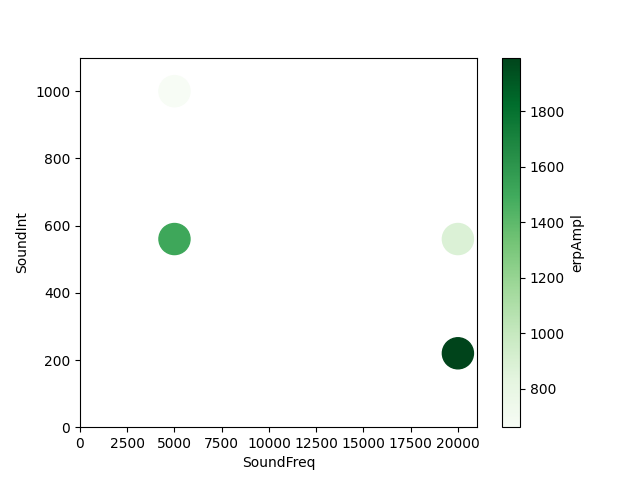

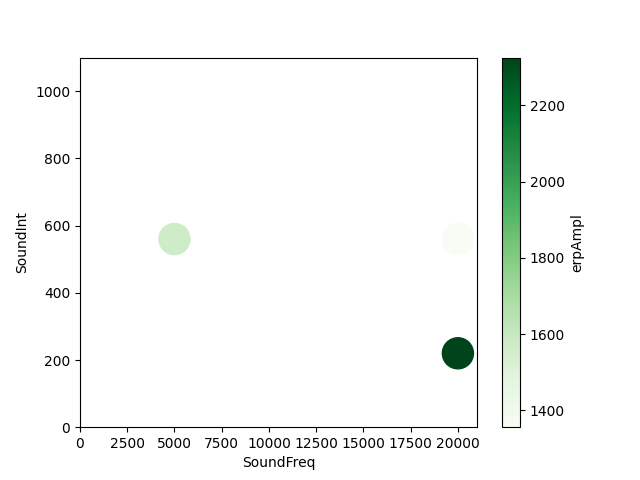

No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm: fdf8961ff2754508b9e81d0c81937d4b
No such comm:

In [249]:
display(conditions)
conditions[~conditions.erpAmpl.isnull()].groupby(['SoundFreq','SoundInt'], as_index=False)['erpAmpl'].apply(list)#.plot(kind='bar')
conditions[~conditions.erpAmpl.isnull()].groupby('Animal').plot.scatter(x="SoundFreq", y="SoundInt", c="erpAmpl",s=500, cmap="Greens", ylim=(0, 1100), xlim=(0, 21000))#, c='Animal')
